In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# Sex 칼럼 문자 => 라벨 인코딩

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts().sort_index()

Sex
0    1307
1    1342
2    1528
Name: count, dtype: int64

# 상관관계 행렬을 히트맵으로 표시

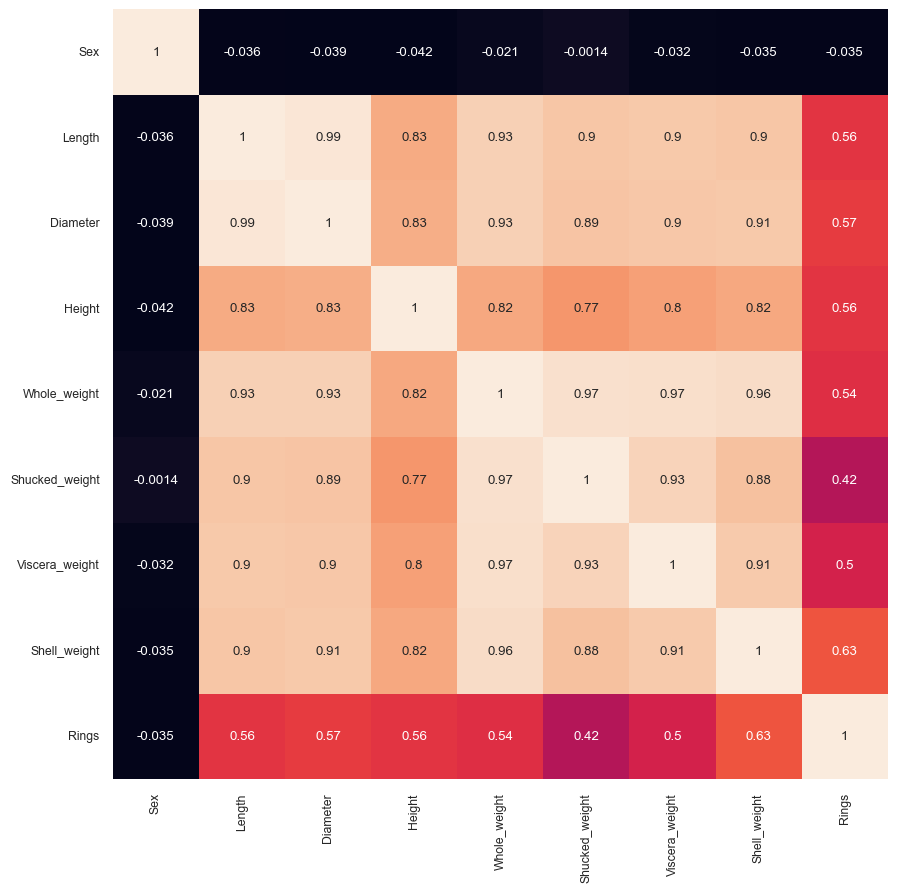

In [5]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr() # 상관관계 행렬 

#히트맵
plt.figure(figsize=(10,10)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Rings와 상관관계가 가장 높은건 Shell_weight 칼럼 	

# shell_weight 열의 인덱스 찾기(FOR 산점도)

In [6]:
shell_weight_index = df.columns.get_loc('Shell_weight')

print(f'shell_weight 열의 인덱스: {shell_weight_index}')

shell_weight 열의 인덱스: 7


# 1. 데이터 준비

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
X = df.drop('Rings',axis=1) 
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [44]:
y = df['Rings'] 
y.value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

# 정규화

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터에 정규화 적용 (각 열에 대해 Z-score 계산)

X_n = X.drop('Sex', axis=1)

scaled_data = scaler.fit_transform(X_n) # Numpy값으로 반환 

# 정규화된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=X_n.columns)

scaled_df.insert(0, 'Sex', df['Sex']) 

X = scaled_df

In [46]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,2,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,2,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,1,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,0,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,2,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,2,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


## 딥러닝 입력을 위해 Numpy로 변환

In [47]:
X = X.values
X

array([[ 2.        , -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 2.        , -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.        ,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 2.        ,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.        ,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 2.        ,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

# 훈련, 검증 데이터셋 준비

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3341, 8), (3341,), (836, 8), (836,))

## 입력 특징 개수 도출 

In [50]:
input_dim = X_train.shape[1]
print(input_dim)

8


# 회귀 모델 구축

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Dropout

model = Sequential()

model.add(Dense(64,input_shape=(input_dim,),activation='relu')) # input_shape => 입력 데이터의 형태를 알 수 있게 해줌 
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1)) # 활성화 함수 없음 

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse']) # 회귀 문제에서 손실함수는 mse <=> 분류 문제 

model.summary()

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
N_EPOCHS = 50

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test) # 예측값 

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 75.8051 - mse: 75.8051 - val_loss: 20.6705 - val_mse: 20.6705
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3781 - mse: 19.3781 - val_loss: 10.6819 - val_mse: 10.6819
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0873 - mse: 13.0873 - val_loss: 5.9145 - val_mse: 5.9145
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.3914 - mse: 13.3914 - val_loss: 5.2719 - val_mse: 5.2719
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6107 - mse: 7.6107 - val_loss: 6.0222 - val_mse: 6.0222
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9504 - mse: 7.9504 - val_loss: 5.1138 - val_mse: 5.1138
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3641 - mse: 7.3641 - val_loss: 4.9198 - val_mse: 4.9198
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1569 - mse: 7.1569 - val_loss: 4.9674 - val_mse: 4.9674
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3

# 모델 평가

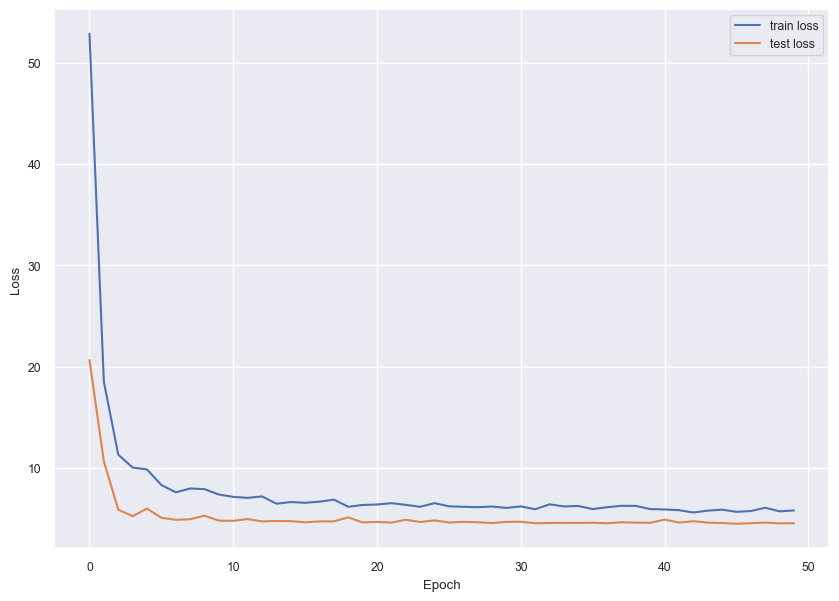

In [39]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MSE 체크 

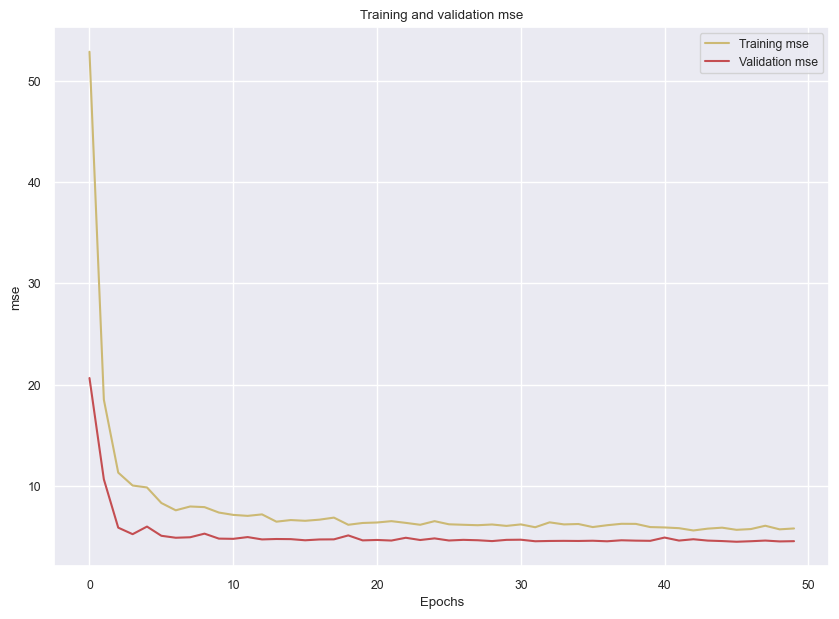

In [40]:
mse =history.history['mse']
val_mse =history.history['val_mse']
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), mse, 'y', label='Training mse')
plt.plot(range(N_EPOCHS), val_mse, 'r', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [41]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1631 - mse: 4.1631 


[4.582443714141846, 4.582443714141846]

# 실제값 예측값 비교(산점도: 제일 상관관계가 높았던 Shell_weight 칼럼 이용)

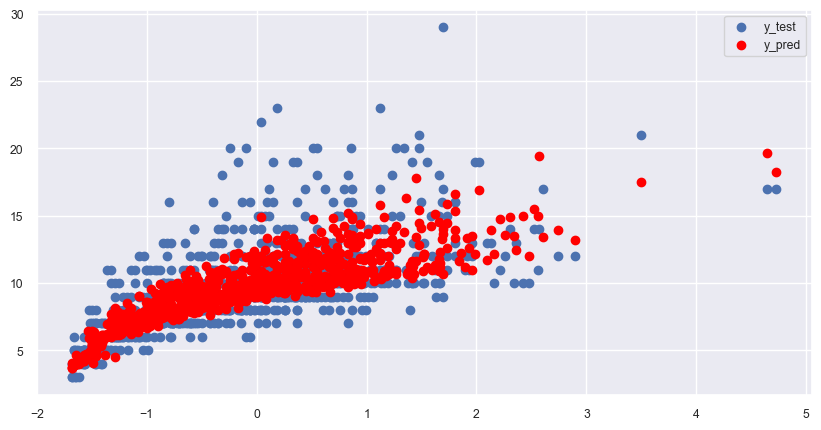

In [51]:
y_test.shape, y_pred.shape
plt.figure(figsize=(10,5)) 
plt.scatter(X_test[:,shell_weight_index], y_test, label='y_test') # SkinThickness는 3번째 열, [:, 2]는 모든 행중 2번째 열을 선택하라는 뜻
plt.scatter(X_test[:, shell_weight_index], y_pred, c='red' ,label="y_pred") # 예측값 분포
plt.legend() # 범례 표시 
plt.show()